#Дипломный проект по Python and Statistics

In [279]:
###Загружаем все библиотеки

import pandas as pd
import numpy as np

import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [152]:
hr = pd.read_csv('HR.csv',sep=',').reset_index()
hr[:50:5]

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
5,5,0.41,0.50,2,153,3,0,1,0,sales,low
10,10,0.45,0.54,2,135,3,0,1,0,sales,low
15,15,0.38,0.54,2,143,3,0,1,0,sales,low
20,20,0.11,0.83,6,282,4,0,1,0,sales,low
25,25,0.89,0.92,5,242,5,0,1,0,sales,low
30,30,0.09,0.62,6,294,4,0,1,0,accounting,low
35,35,0.10,0.94,6,255,4,0,1,0,technical,low
40,40,0.87,0.88,5,269,5,0,1,0,technical,low
45,45,0.84,0.74,3,182,4,0,1,0,technical,low


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пропусков нет, сет в заполнении не нуждается

##**Расчет осноных статистик для переменных**

###**Мода**

In [6]:
print('Уровень удовлетворенности работой:', hr['satisfaction_level'].mode()[0])
print('Время с момента последней оценки в годах:', hr['last_evaluation'].mode()[0])
print('Количество проектов, выполненных за время работы:', hr['number_project'].mode()[0])
print('Среднее количество часов на рабочем месте в месяц:', hr['average_montly_hours'].mode()[0])
print('Стаж работы в компании в годах:', hr['time_spend_company'].mode()[0])
print('Происходили ли несчастные случаи на рабочем месте с сотрудником:', hr['Work_accident'].mode()[0])
print('уволился ли сотрудник:', hr['left'].mode()[0])
print('повышался ли сотрудник за последние пять лет:', hr['promotion_last_5years'].mode()[0])

Уровень удовлетворенности работой: 0.1
Время с момента последней оценки в годах: 0.55
Количество проектов, выполненных за время работы: 4
Среднее количество часов на рабочем месте в месяц: 135
Стаж работы в компании в годах: 3
Происходили ли несчастные случаи на рабочем месте с сотрудником: 0
уволился ли сотрудник: 0
повышался ли сотрудник за последние пять лет: 0


Судя по "моде" очень низкая удовлетворенность работой , большая часть сотрудников отработав 3 года вероятнее всего увольнялась, хоть и работали в среднем по 135часов в месяц

###**Средние показатели**

In [11]:
print('Уровень удовлетворенности работой:', hr['satisfaction_level'].mean().round(3))
print('Время с момента последней оценки в годах:', hr['last_evaluation'].mean().round(3))
print('Количество проектов, выполненных за время работы:', hr['number_project'].mean().round(3))
print('Среднее количество часов на рабочем месте в месяц:', hr['average_montly_hours'].mean().round(3))
print('Стаж работы в компании в годах:', hr['time_spend_company'].mean().round(3))
print('Происходили ли несчастные случаи на рабочем месте с сотрудником:', hr['Work_accident'].mean().round(3))
print('уволился ли сотрудник:', hr['left'].mean().round(3))
print('повышался ли сотрудник за последние пять лет:', hr['promotion_last_5years'].mean().round(3))

Уровень удовлетворенности работой: 0.613
Время с момента последней оценки в годах: 0.716
Количество проектов, выполненных за время работы: 3.803
Среднее количество часов на рабочем месте в месяц: 201.05
Стаж работы в компании в годах: 3.498
Происходили ли несчастные случаи на рабочем месте с сотрудником: 0.145
уволился ли сотрудник: 0.238
повышался ли сотрудник за последние пять лет: 0.021


Показатели несчастных случаев очень низкий, как и с модой в основном сотруднии отработали ~3 года , в среднем 23% уволившихся , количество проектов на душу ~4 ,сотрудник в месяц работают ~200часов  


###**Медиана**

In [14]:
print('Уровень удовлетворенности работой:', hr['satisfaction_level'].median())
print('Время с момента последней оценки в годах:', hr['last_evaluation'].median())
print('Количество проектов, выполненных за время работы:', hr['number_project'].median())
print('Среднее количество часов на рабочем месте в месяц:', hr['average_montly_hours'].median())
print('Стаж работы в компании в годах:', hr['time_spend_company'].median())
print('Происходили ли несчастные случаи на рабочем месте с сотрудником:', hr['Work_accident'].median())
print('уволился ли сотрудник:', hr['left'].median())
print('повышался ли сотрудник за последние пять лет:', hr['promotion_last_5years'].median())

Уровень удовлетворенности работой: 0.64
Время с момента последней оценки в годах: 0.72
Количество проектов, выполненных за время работы: 4.0
Среднее количество часов на рабочем месте в месяц: 200.0
Стаж работы в компании в годах: 3.0
Происходили ли несчастные случаи на рабочем месте с сотрудником: 0.0
уволился ли сотрудник: 0.0
повышался ли сотрудник за последние пять лет: 0.0


###**Максимальный и минимальные показатели**

In [23]:
print(f'Уровень удовлетворенности работой:{hr.satisfaction_level.min()},{hr.satisfaction_level.max()}')
print(f'Время с момента последней оценки в годах: {hr.last_evaluation.min()},{hr.last_evaluation.max()}')
print(f'Количество проектов, выполненных за время работы: {hr.number_project.min()},{hr.number_project.max()}')
print(f'Среднее количество часов на рабочем месте в месяц: {hr.average_montly_hours.min()},{hr.average_montly_hours.max()}')
print(f'Стаж работы в компании в годах: {hr.time_spend_company.min()}, {hr.time_spend_company.max()}')
print(f'Происходили ли несчастные случаи на рабочем месте с сотрудником:{hr.Work_accident.min()}, {hr.Work_accident.max()}')
print(f'уволился ли сотрудник: {hr.left.min()},{hr.left.max()}')
print(f'повышался ли сотрудник за последние пять лет: {hr.promotion_last_5years.min()}, {hr.promotion_last_5years.max()}')

Уровень удовлетворенности работой:0.09,1.0
Время с момента последней оценки в годах: 0.36,1.0
Количество проектов, выполненных за время работы: 2,7
Среднее количество часов на рабочем месте в месяц: 96,310
Стаж работы в компании в годах: 2, 10
Происходили ли несчастные случаи на рабочем месте с сотрудником:0, 1
уволился ли сотрудник: 0,1
повышался ли сотрудник за последние пять лет: 0, 1


###**Среднее отклонение**

In [25]:
print('Уровень удовлетворенности работой:', hr['satisfaction_level'].std().round(3))
print('Время с момента последней оценки в годах:', hr['last_evaluation'].std().round(3))
print('Количество проектов, выполненных за время работы:', hr['number_project'].std().round(3))
print('Среднее количество часов на рабочем месте в месяц:', hr['average_montly_hours'].std().round(3))
print('Стаж работы в компании в годах:', hr['time_spend_company'].std().round(3))
print('Происходили ли несчастные случаи на рабочем месте с сотрудником:', hr['Work_accident'].std().round(3))
print('уволился ли сотрудник:', hr['left'].std().round(3))
print('повышался ли сотрудник за последние пять лет:', hr['promotion_last_5years'].std().round(3))

Уровень удовлетворенности работой: 0.249
Время с момента последней оценки в годах: 0.171
Количество проектов, выполненных за время работы: 1.233
Среднее количество часов на рабочем месте в месяц: 49.943
Стаж работы в компании в годах: 1.46
Происходили ли несчастные случаи на рабочем месте с сотрудником: 0.352
уволился ли сотрудник: 0.426
повышался ли сотрудник за последние пять лет: 0.144


#**Корреляция**

In [131]:
##Для расчета корреляции оставляем только колличественные показатели
col_hr = hr[['satisfaction_level','last_evaluation','number_project',	'average_montly_hours',	'time_spend_company']]
col_hr[:30:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
5,0.41,0.50,2,153,3
10,0.45,0.54,2,135,3
15,0.38,0.54,2,143,3
20,0.11,0.83,6,282,4
25,0.89,0.92,5,242,5


In [133]:
corr_ = col_hr.corr()
corr_.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [136]:
max_cor = col_hr[['number_project','average_montly_hours']].corr().values[0][1]
min_cor = col_hr[['number_project','satisfaction_level']].corr().values[0][1]
print(f'Наиболее скоррелированные переменные:number_project, average_montly_hours \nKоэффициент кроеляции составляет: {max_cor.round(3)}')
print(f'Наименее скоррелированные переменные:number_project, satisfaction_level \nKоэффициент кроеляции составляет: {min_cor.round(3)}')


Наиболее скоррелированные переменные:number_project, average_montly_hours 
Kоэффициент кроеляции составляет: 0.417
Наименее скоррелированные переменные:number_project, satisfaction_level 
Kоэффициент кроеляции составляет: -0.143


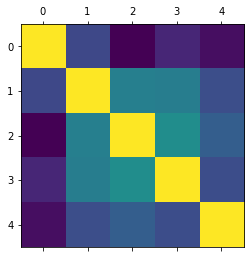

In [137]:
plt.matshow(corr_)
plt.show()

<Axes: >

<Figure size 432x288 with 0 Axes>

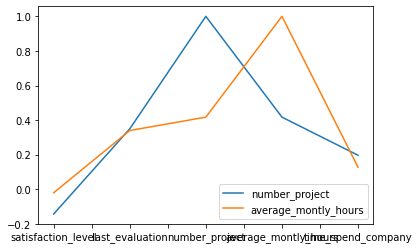

In [149]:
max_cor = corr_[['number_project','average_montly_hours']]
plt.figure()
max_cor.plot()

чем больше сотрудник работает тем больше он выпалняет проектов

<Axes: >

<Figure size 432x288 with 0 Axes>

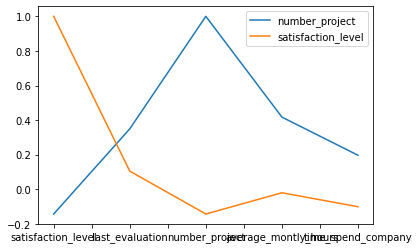

In [148]:
min_cor = corr_[['number_project','satisfaction_level']]
plt.figure()
min_cor.plot()

колчество выполненных проектов сотрудником не сльно влияют уровень удовлетворенности работой

#**Расчетная часть**


**Количество сотрудников в каждом разделе**

In [175]:
count_staff = hr.groupby('department').count().reset_index()
count_staff = count_staff[['department','index']]
count_staff

,department,index
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


**Распределение сотрудников по зарплате**

In [202]:
salary_staff = hr.groupby('salary').count()
salary_staff = salary_staff[['index']]
salary_staff 

,index
salary,
high,1237
low,7316
medium,6446


<Axes: ylabel='salary'>

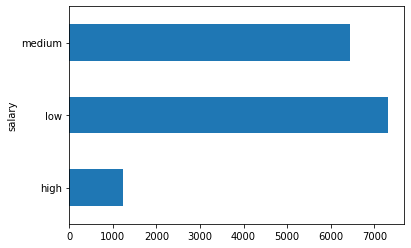

In [291]:
hr.groupby('salary')['salary'].count().plot(kind="barh")

**Распределение сотрудников по департаменту и зарплате**

In [185]:
hr.pivot_table(index = 'department',
                  columns = 'salary', 
                  values = 'index',
                   aggfunc='count',
                   margins=True)

salary,high,low,medium,All
department,,,,
IT,83,609,535,1227
RandD,51,364,372,787
accounting,74,358,335,767
hr,45,335,359,739
management,225,180,225,630
marketing,80,402,376,858
product_mng,68,451,383,902
sales,269,2099,1772,4140
support,141,1146,942,2229


#**Проверка гипотезы**

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом!\
Н0: Оклад у тех кто больше работает не отличается от оклада других сотрудников\
Н1: Оклады у тех кто больше работает и тех кто работает по веремени меньше,отличаются

In [204]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [205]:
low_salary = hr.loc[(hr['salary']=='low')]
high_salary = hr.loc[(hr['salary']=='high')]

In [208]:
print(f"Показатель среднего времени проведенного на работе, для сотрудников с низким уровнем зарплаты: {low_salary.average_montly_hours.mean()}")
print(f"Показатель среднего времени проведенного на работе, для сотрудников с высоким уровнем зарплаты: {high_salary.average_montly_hours.mean()}")

Показатель среднего времени проведенного на работе, для сотрудников с низким уровнем зарплаты: 200.9965828321487
Показатель среднего времени проведенного на работе, для сотрудников с высоким уровнем зарплаты: 199.86742118027485


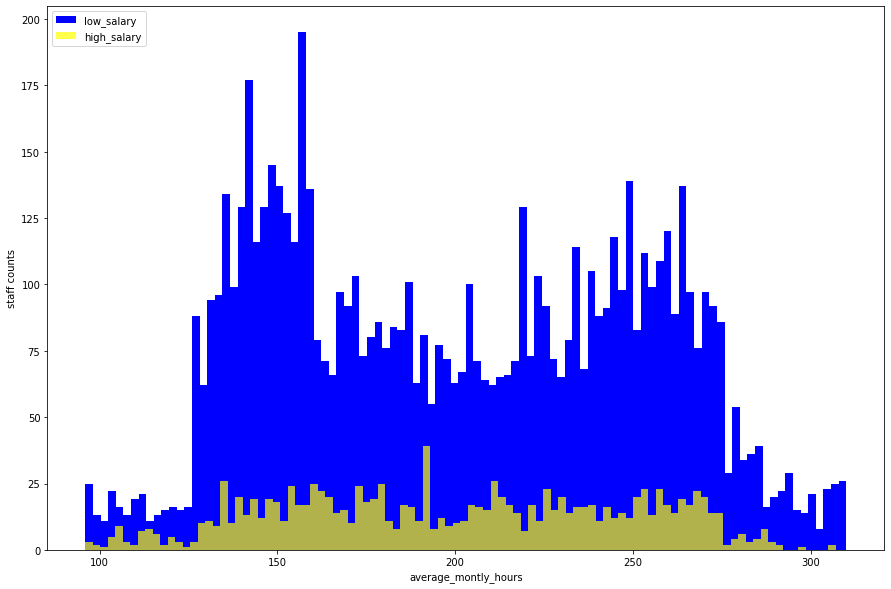

In [215]:
bins = 100
plt.figure(figsize=(15, 10))
plt.hist(low_salary['average_montly_hours'], bins=bins, alpha=1, color='blue', label='low_salary')
plt.hist(high_salary['average_montly_hours'], bins=bins, alpha=0.7,color='yellow', label='high_salary')
plt.legend(loc='upper left')

plt.xlabel('average_montly_hours')
plt.ylabel('staff counts')

plt.show()

In [224]:
stat,p = stats.ttest_ind(low_salary.average_montly_hours,high_salary.average_montly_hours)
print('Статистика=%.3f,p=%.10f' % (stat,p))
if p > 0.05:
  print('Не отклоняем Н0: средние,вероятно ,одинаковы')
else:
  print('Отклоняем Н0: средние , вероятно,различаются')

Статистика=0.729,p=0.4661023478
Не отклоняем Н0: средние,вероятно ,одинаковы


Следовательно б**о**количество проведенное на рабоете не сказывается на уровне зарплаты сотрудников

#**Уволившиеся и не уволившиеся сотрудники**

**Доля сотрудников с повышением за последние 5 лет**

In [239]:
dis_staff = hr.loc[(hr['left']== 1)]
staff = hr.loc[(hr['left'] == 0)]

In [238]:
left = hr.groupby('left').sum()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,,
0,89268002,7620.30,8176.43,43274,2274860,38627,2000,300
1,23209499,1571.59,2564.38,13768,740694,13843,169,19


In [254]:
print('Доля сотрудников получивших повышение:',(staff.agg({'promotion_last_5years':'sum'}).values[0]/\
staff.agg({'index':'count'}).values[0]).round(5))

Доля сотрудников получивших повышение: 0.02625


In [256]:
print("Доля ,уволившихся сотрудников, получивших повышение: ",(dis_staff.agg({'promotion_last_5years':'sum'}).values[0]/\
dis_staff.agg({'index':'count'}).values[0]).round(5))

Доля ,уволившихся сотрудников, получивших повышение:  0.00532


**Средняя степень удовлетворенности**

In [259]:
hr.groupby('left').agg({'satisfaction_level':'mean'})

,satisfaction_level
left,
0,0.666810
1,0.440098


Средняя степень удовлетворенности уолившихся = 0.44%\
Средняя степень удовлетворенности уолившихся = 0.67%

**Среднее количество проектов**

In [260]:
hr.groupby('left').agg({'number_project':'mean'})

,number_project
left,
0,3.786664
1,3.855503


Среднее количество проектов у не уволившихся сотрудников~ 3.78\
Средняя количество проектов у уволившихся сотрудников ~ 3.85

#**LDA_model**

In [275]:
mod = hr.drop(['department','salary','index'],axis=1)

In [277]:
mod[:50:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
10,0.45,0.54,2,135,3,0,1,0
15,0.38,0.54,2,143,3,0,1,0
20,0.11,0.83,6,282,4,0,1,0
25,0.89,0.92,5,242,5,0,1,0
30,0.09,0.62,6,294,4,0,1,0
35,0.10,0.94,6,255,4,0,1,0
40,0.87,0.88,5,269,5,0,1,0
45,0.84,0.74,3,182,4,0,1,0


In [278]:
X = mod.drop('left',axis=1)
y = mod.left

In [280]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42)

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [283]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [284]:
y_pred = lda.predict(X_test)

In [285]:
from sklearn.metrics import classification_report
target_names = ['dismissals', 'not_dismissals']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

    dismissals       0.79      0.91      0.85      2853
not_dismissals       0.47      0.25      0.32       897

      accuracy                           0.75      3750
     macro avg       0.63      0.58      0.59      3750
  weighted avg       0.72      0.75      0.72      3750

